In [1]:
import numpy as np
from scipy import ndimage
import tensorflow as tf
from os import listdir

#has package pillow as a dependency. Is needed to give scipy image operations. 
from scipy import misc
import scipy

from modules.utils import *
from modules.model import *

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import modules.vgg.vgg19 as vgg19

In [6]:
vgg_r = vgg19.Vgg19(vgg19_npy_path="data/vgg19.npy")
vgg_f = vgg19.Vgg19(vgg19_npy_path="data/vgg19.npy")

npy file loaded


In [12]:
IMAGE_FOLDER = "data/anime wallpapers"
image_png_names = listdir(IMAGE_FOLDER + "/png")
image_nb_names = listdir(IMAGE_FOLDER + "/no_blurry")
image_jpg_names = listdir(IMAGE_FOLDER + "/jpg")
num_pngs = len(image_png_names)
num_jpgs = len(image_jpg_names)
image_png_paths = [IMAGE_FOLDER + '/png/' + name for name in image_png_names]
image_nb_paths = [IMAGE_FOLDER + '/no_blurry/' + name for name in image_nb_names]
image_jpg_paths = [IMAGE_FOLDER + '/jpg/' + name for name in image_jpg_names]

In [136]:
test_input = tf.placeholder('float32', shape = [None, 1080, 1920, 3])
BATCH_SIZE = 1
ksizes = [1, 1080, 1080, 1]
strides = [1, 1080, 1080, 1]
rates = [1, 1, 1, 1]
padding = 'VALID'

extracted = tf.extract_image_patches(test_input, ksizes, strides, rates, padding)
shape = extracted.get_shape()
reshaped = tf.reshape(extracted, [-1,1080,1080,3])
casted = tf.cast(reshaped, 'uint8')

#vgg.build(test_input)
out = vgg.prob

In [137]:
init = tf.initialize_all_variables()

In [138]:
sess = tf.Session()
sess.run(init)

In [139]:
in_image = np.array([scipy.misc.imresize(scipy.misc.imread(image_nb_paths[0]),[1080,1920])])

In [140]:
(sample) = sess.run(casted,feed_dict={test_input:in_image})

In [141]:
print(sample.shape)
#s0 = sample[0][0][0]

(1, 1080, 1080, 3)


In [142]:
1920//100-1

18

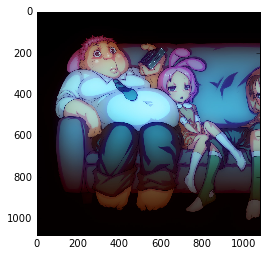

In [143]:
plt.imshow(s0.reshape([1080,1080,3]))